# Advanced Regression Assignment Submision
- Mandheer Singh

Problem Statement: A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

# Data Loading and Understanding

In [1]:
#Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
 #importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.set_option("max_rows", None)
sns.set(style='darkgrid')

In [3]:
housing=pd.read_csv('train.csv',encoding = "ISO-8859-1")

In [4]:
# glanicing the dataset overall.
# seeing first ten rows
housing.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:
housing.shape

(1460, 81)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Cleaning and EDA
## Null value Treatment and Type conversions

In [7]:
#calculating missing value percentage in each column
round(housing.isnull().sum(axis=0)/len(housing.index),2)*100

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

In [8]:
#dropping columns having more than 50% missing values and have no meaningful NA
housing.drop('MiscFeature',axis=1,inplace=True)

In [9]:
housing['Electrical'].value_counts()


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [10]:
housing['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

As per the data dictionary provided following NAs have Meanings associated with them so we can impute as follows:
- Alley can be imputed with "No Alley"
- PoolQC can be imputed with "No Pool"
- Fence can be imputed with "No Fence"
- FirePlaceQu can be imputed with "No FirePlace"
- Thus We can impute the GarageType,GarageFinish,GarageQual,GarageCond with "No Garage"
- We can impute BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2 with "No Basement".
- Column 'Electrical' has 1 missing value so we can impute it with the mode of the Category i.e. 'SBrkr'
- Column 'MasVnrType' has 8 missing values so we can impute it with the mode of the Category i.e. 'None'

In [11]:
#Imputing all categorical Variables in the original dataframe with meaningfull NA or Mode
housing['Alley']=housing['Alley'].fillna('No Alley')
housing['PoolQC']=housing['PoolQC'].fillna('No PoolQC')
housing['Fence']=housing['Fence'].fillna('No Fence')
housing['FireplaceQu']=housing['FireplaceQu'].fillna('No Fireplace')
housing['GarageType']=housing['GarageType'].fillna('No Garage')
housing['GarageFinish']=housing['GarageFinish'].fillna('No Garage')
housing['GarageQual']=housing['GarageQual'].fillna('No Garage')
housing['GarageCond']=housing['GarageCond'].fillna('No Garage')
housing['BsmtQual']=housing['BsmtQual'].fillna('No Basement')
housing['BsmtCond']=housing['BsmtCond'].fillna('No Basement')
housing['BsmtExposure']=housing['BsmtExposure'].fillna('No Basement')
housing['BsmtFinType1']=housing['BsmtFinType1'].fillna('No Basement')
housing['BsmtFinType2']=housing['BsmtFinType2'].fillna('No Basement')
housing['Electrical']=housing['Electrical'].fillna('SBrkr')
housing['MasVnrType']=housing['MasVnrType'].fillna('None')

In [12]:
housing.shape

(1460, 80)

In [13]:
#calculating missing value percentage in each column
round(housing.isnull().sum(axis=0)/len(housing.index),2)*100

Id                0.0
MSSubClass        0.0
MSZoning          0.0
LotFrontage      18.0
LotArea           0.0
Street            0.0
Alley             0.0
LotShape          0.0
LandContour       0.0
Utilities         0.0
LotConfig         0.0
LandSlope         0.0
Neighborhood      0.0
Condition1        0.0
Condition2        0.0
BldgType          0.0
HouseStyle        0.0
OverallQual       0.0
OverallCond       0.0
YearBuilt         0.0
YearRemodAdd      0.0
RoofStyle         0.0
RoofMatl          0.0
Exterior1st       0.0
Exterior2nd       0.0
MasVnrType        0.0
MasVnrArea        1.0
ExterQual         0.0
ExterCond         0.0
Foundation        0.0
BsmtQual          0.0
BsmtCond          0.0
BsmtExposure      0.0
BsmtFinType1      0.0
BsmtFinSF1        0.0
BsmtFinType2      0.0
BsmtFinSF2        0.0
BsmtUnfSF         0.0
TotalBsmtSF       0.0
Heating           0.0
HeatingQC         0.0
CentralAir        0.0
Electrical        0.0
1stFlrSF          0.0
2ndFlrSF          0.0
LowQualFin

In [14]:
# Although the type of variables is numeric but there may be the condition that the 
# nature of variable is categorical 
# Thus numerical variables which we should consider as the categircal variable
To_be_cat=['MSSubClass', 'OverallQual', 'OverallCond',   
                                    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
                                   'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 
                                   'MoSold', 'YrSold']


In [15]:
#converting numerical to categorical
housing[To_be_cat]=housing[To_be_cat].astype('object')

In [16]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

- 'GarageYrBlt' has also have 81 mising values showing that there is no garage so lets replace it with zero

In [17]:
housing['GarageYrBlt']=housing['GarageYrBlt'].fillna(0)

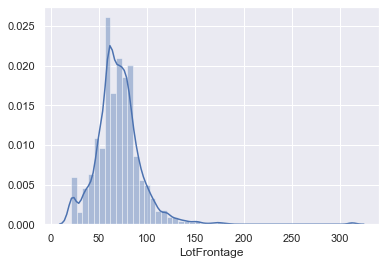

In [18]:
sns.distplot(housing['LotFrontage'])

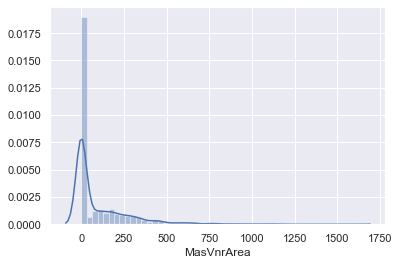

In [19]:
sns.distplot(housing['MasVnrArea'])

- We Left with only two columns 'LotFrontage' and 'MasVnrArea'with 259 and 8 missing values
- We can impute it with median of lot frontage
- We can impute MasVnrArea with value 0 


In [20]:
med=housing['LotFrontage'].median()
housing['LotFrontage']=housing['LotFrontage'].fillna(med)
housing['MasVnrArea']=housing['MasVnrArea'].fillna(0)

In [21]:
housing.isnull().sum(axis=0)

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

- We have no missing values in the dataframe now and we have converted the type of columns also
- now lets handle years columns
- Converting Years to Age as derived features and dropping original ones
    - YearBuilt    <-> AgeofHouse
    - YearRemodAdd     <-> AgeRemodeled
    - GarageYrBlt  <-> AgeofGarage

In [22]:
import datetime 
current_year=datetime.date.today().year
housing['AgeofHouse']=current_year-housing['YearBuilt']
housing['AgeRemodeled']=current_year-housing['YearRemodAdd']
housing['AgeofGarage']=current_year-housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1,inplace=True)

In [23]:
#adding a new derived feature MainArea = Lot Area- PoolArea- GarageArea-MasVnrArea
housing['MainArea']=housing['LotArea']-housing['GarageArea']-housing['PoolArea']-housing['MasVnrArea']
#adding two new features which will tell that house has pool or garage or not
housing['havepool']=housing['PoolArea']>0
housing['havegarage']=housing['GarageArea']>0

In [24]:
housing['havepool']=housing['havepool'].astype('int')
housing['havegarage']=housing['havegarage'].astype('int')

In [25]:
#taking all categorical variables in a separate dataframe
#for the ease of analysis
housing_cat=housing.select_dtypes(include=['object','category'])
print(housing_cat.shape)
housing_cat.head()

(1460, 56)


,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,No Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No PoolQC,No Fence,2,2008,WD,Normal
1,20,RL,Pave,No Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No PoolQC,No Fence,5,2007,WD,Normal
2,60,RL,Pave,No Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No PoolQC,No Fence,9,2008,WD,Normal
3,70,RL,Pave,No Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No PoolQC,No Fence,2,2006,WD,Abnorml
4,60,RL,Pave,No Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No PoolQC,No Fence,12,2008,WD,Normal


In [26]:
#Seprating numercial variables for ease of analysis
housing_nums=housing.select_dtypes(include=['int64','float64'])
print(housing_nums.shape)
housing_nums.head()

(1460, 27)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,AgeofHouse,AgeRemodeled,AgeofGarage,MainArea,havepool,havegarage
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500,17,17,17.0,7706.0,0,1
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500,44,44,44.0,9140.0,0,1
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500,19,18,19.0,10480.0,0,1
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000,105,50,22.0,8908.0,0,1
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000,20,20,20.0,13074.0,0,1


In [27]:
for i in housing_cat.columns:
    print(housing_cat[i].value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor    

As above we should drop some columns where only two levels and one level has very least values such as
- Street
- Utilities

In [28]:
housing.drop(['Street','Utilities'],axis=1,inplace=True)

In [29]:
housing_cat.drop(['Street','Utilities'],axis=1,inplace=True)

Grouping levels to reduce number of dummy variables. We are grouping all levels which have less than 5% frequency as 'other' category

In [30]:
for i in housing_cat.columns:
    series = pd.value_counts(housing[i])
    mask = (series/series.sum() * 100).lt(1)  #masking levels less than 1% values of total
    housing[i]=np.where(housing[i].isin(series[mask].index),'Other',housing[i])
    

In [31]:
for i in housing_cat.columns:
    print(housing[i].value_counts())

20       536
60       299
50       144
120       87
30        69
160       63
70        60
80        58
90        52
190       30
Other     26
85        20
75        16
Name: MSSubClass, dtype: int64
RL       1151
RM        218
FV         65
RH         16
Other      10
Name: MSZoning, dtype: int64
No Alley    1369
Grvl          50
Pave          41
Name: Alley, dtype: int64
Reg      925
IR1      484
IR2       41
Other     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
Other         4
Name: LotConfig, dtype: int64
Gtl      1382
Mod        65
Other      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr    

In [32]:
#dropping Id column as it is not relevant to the model building
housing.drop('Id',axis=1,inplace=True)
housing_nums.drop('Id',axis=1,inplace=True)

In [33]:
housing.shape

(1460, 80)

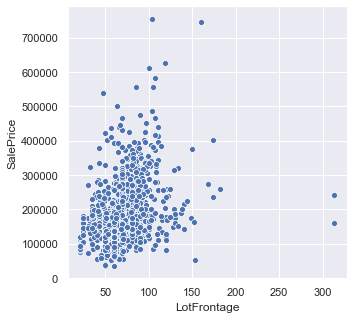

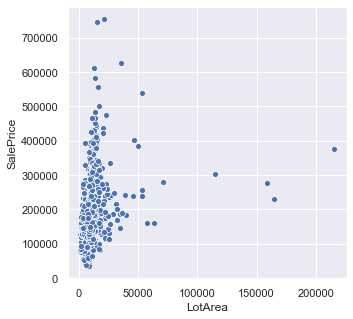

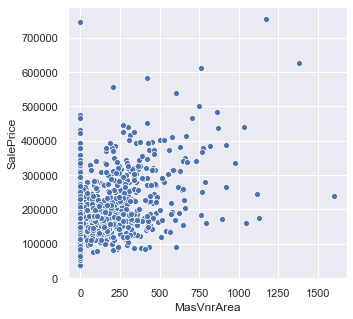

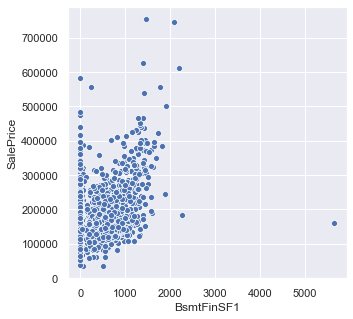

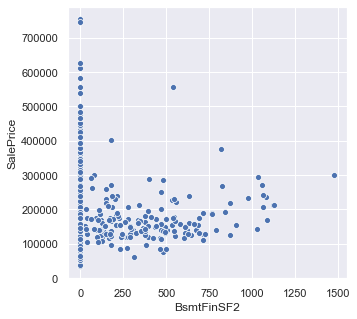

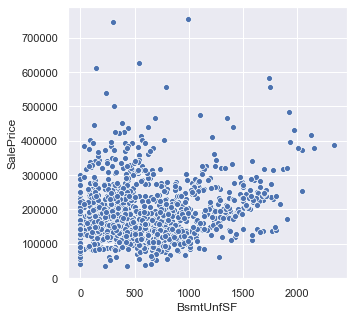

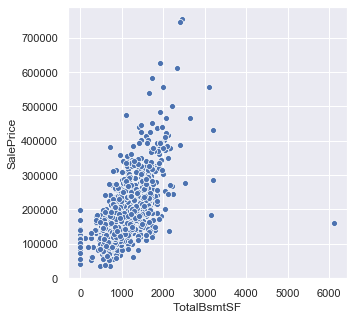

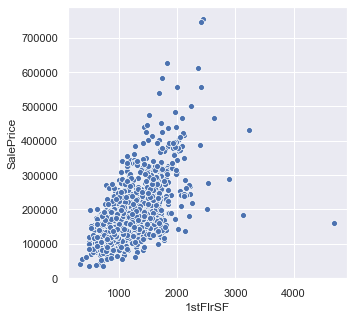

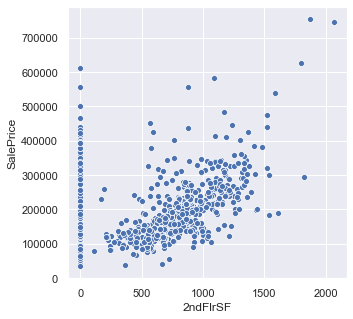

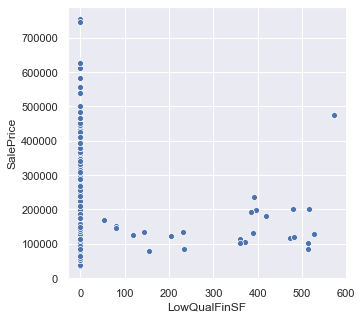

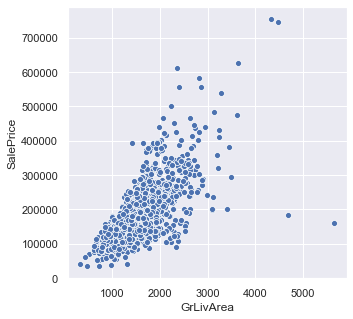

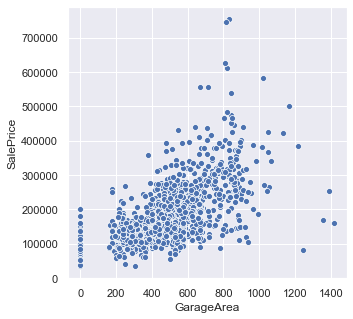

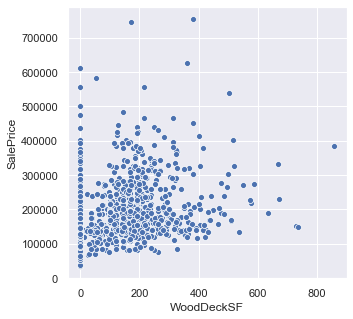

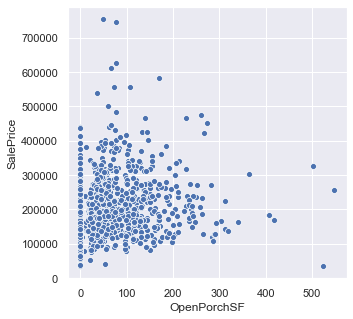

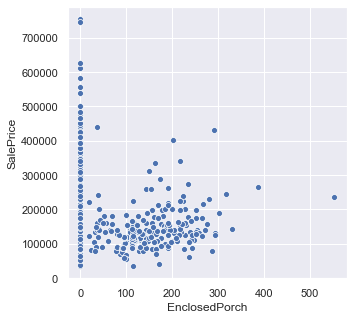

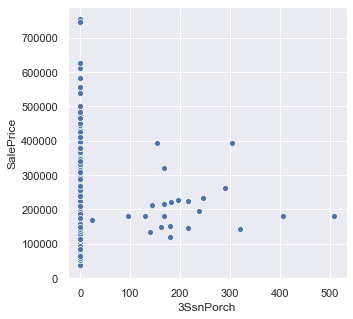

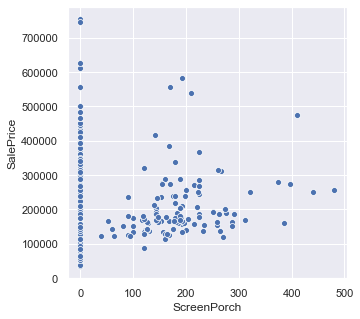

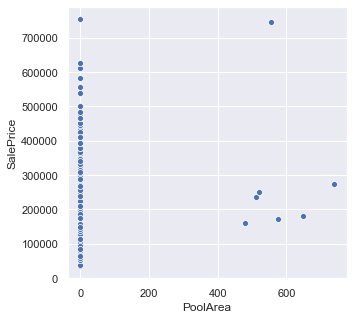

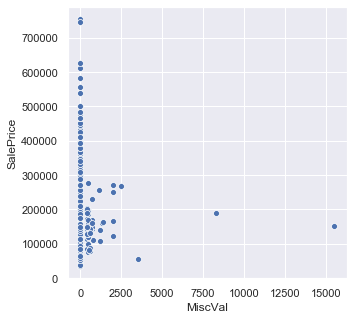

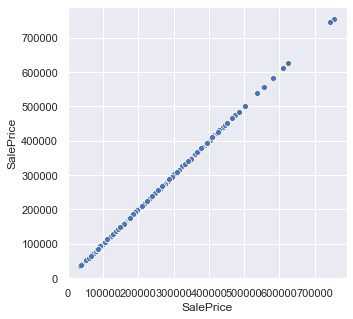

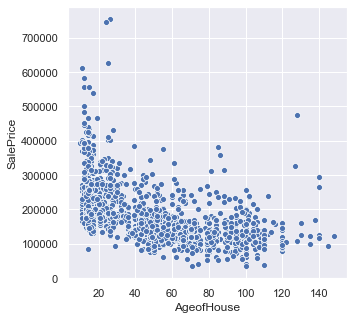

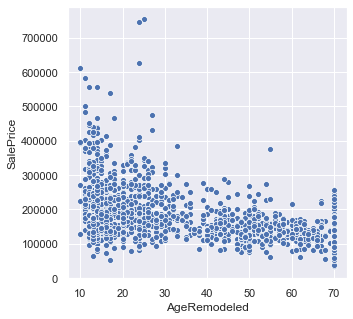

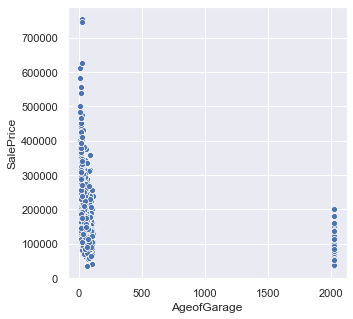

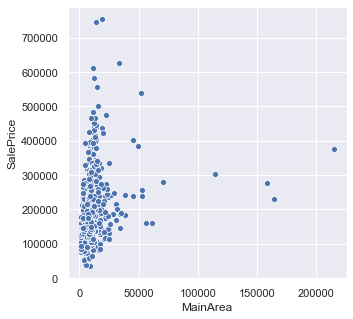

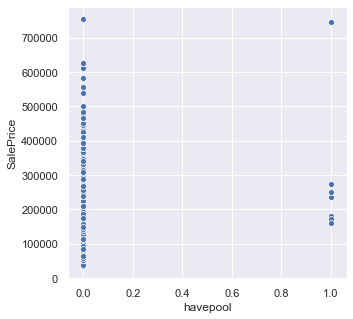

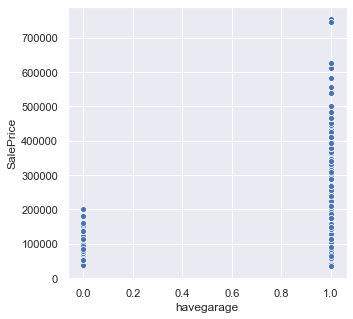

In [34]:
for i in housing_nums.columns:
    plt.figure(figsize=(5,5))
    sns.scatterplot(x=housing_nums[i],y=housing_nums['SalePrice'])
    plt.show()

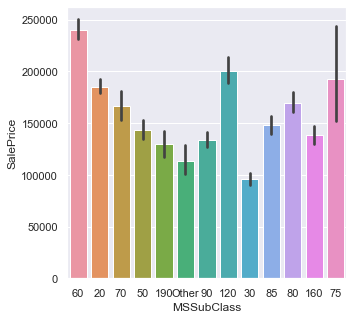

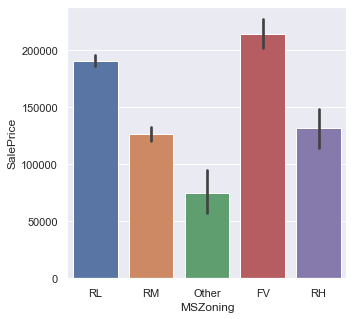

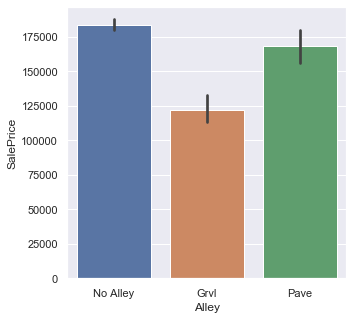

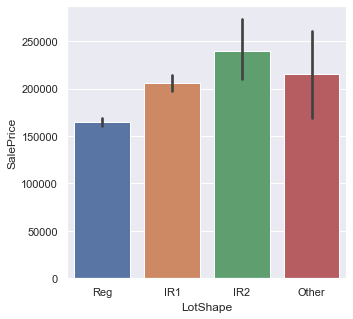

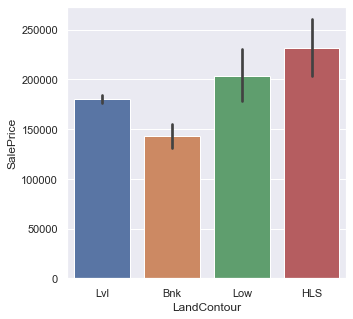

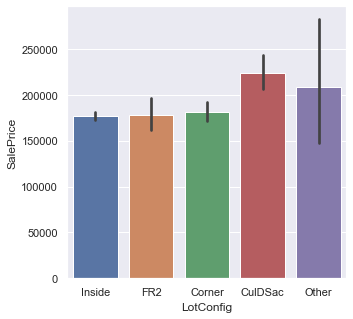

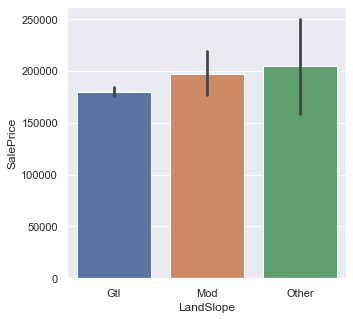

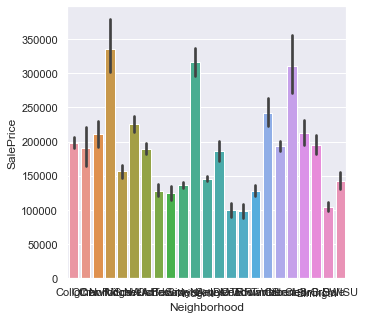

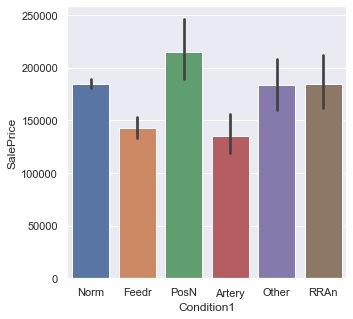

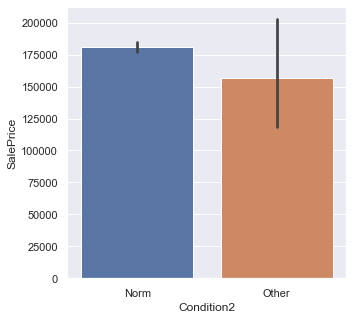

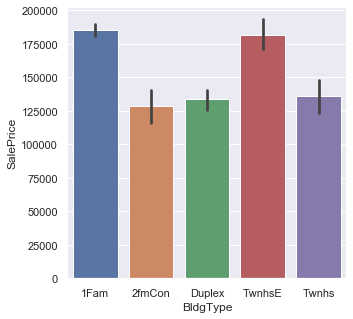

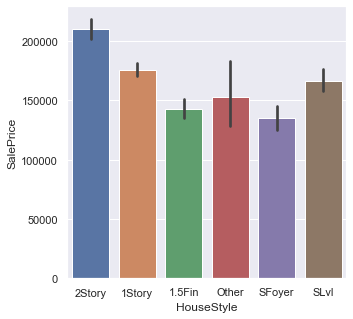

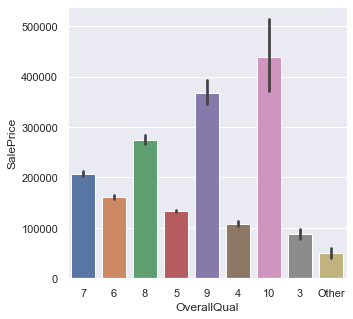

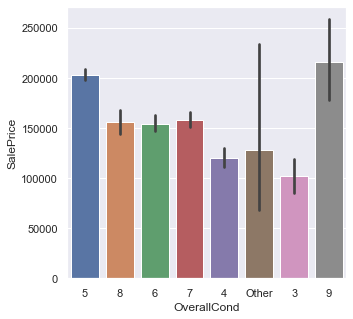

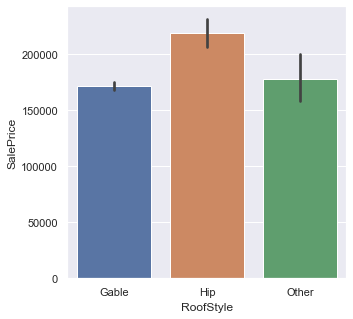

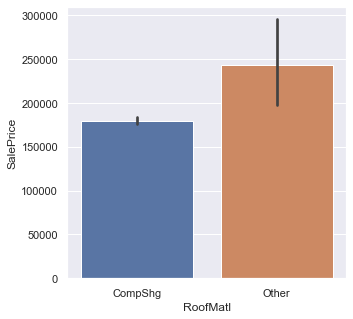

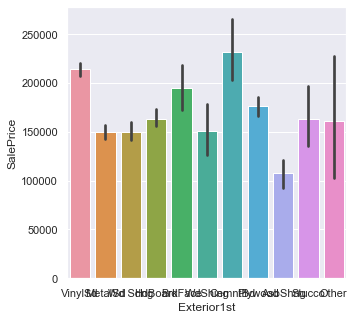

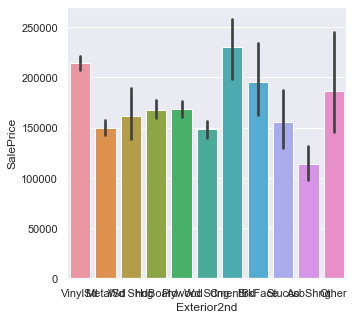

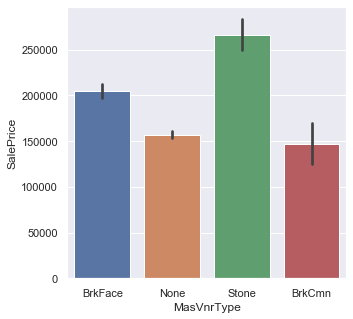

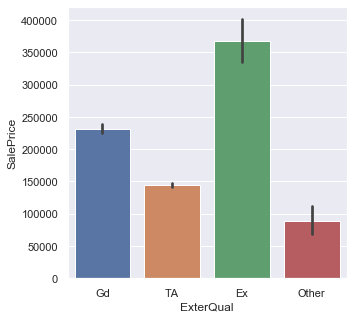

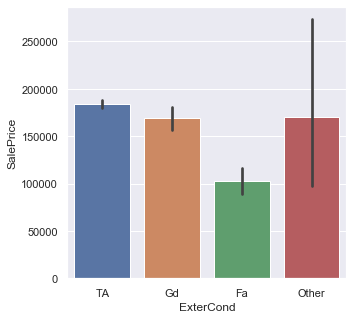

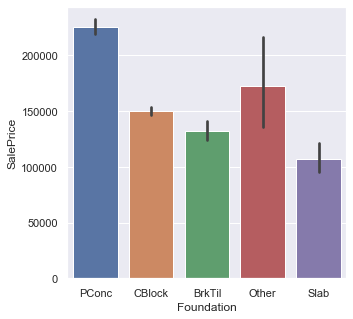

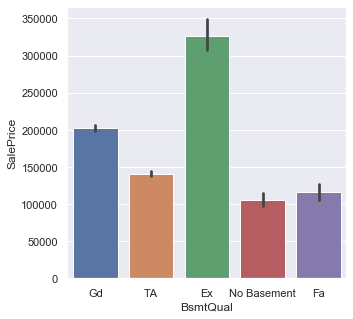

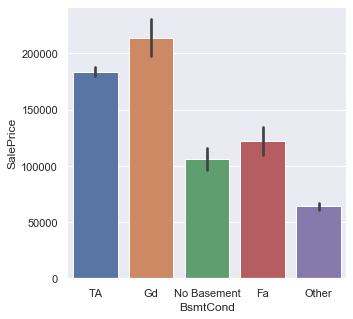

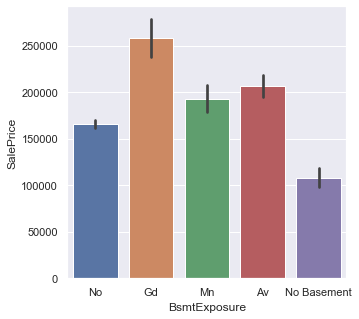

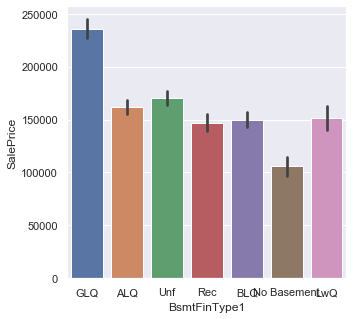

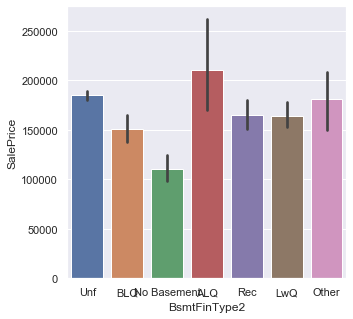

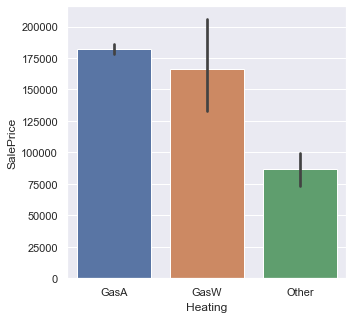

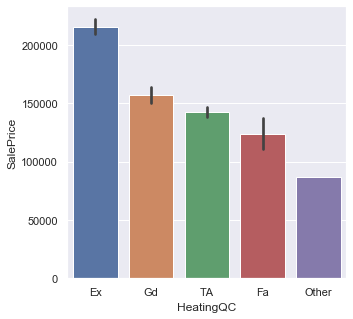

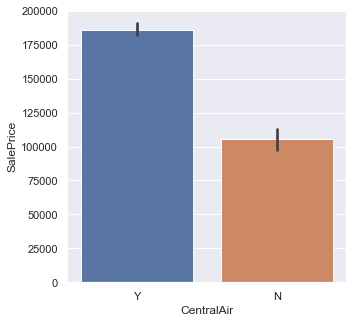

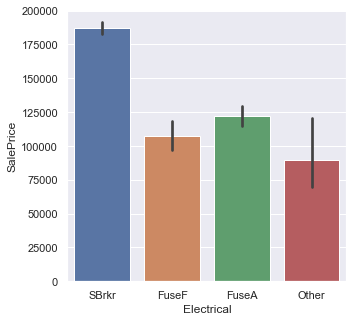

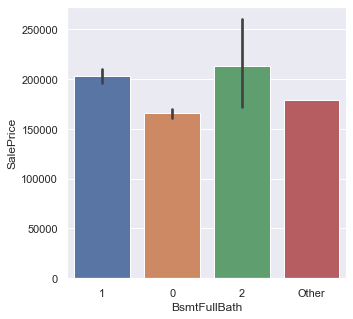

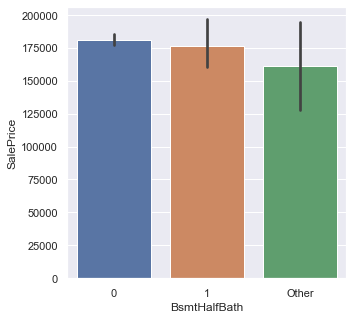

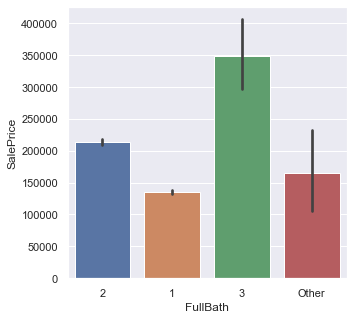

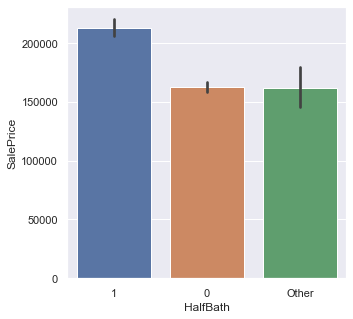

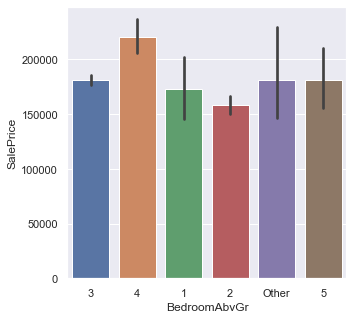

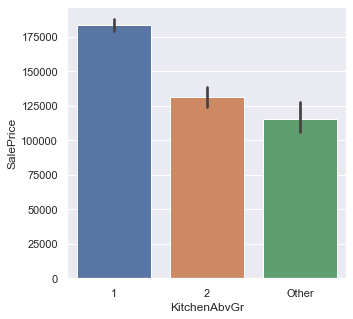

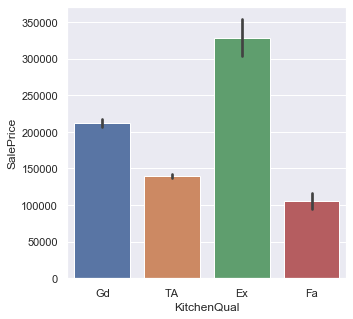

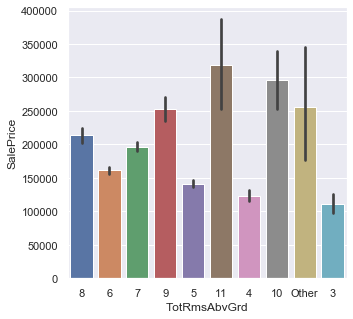

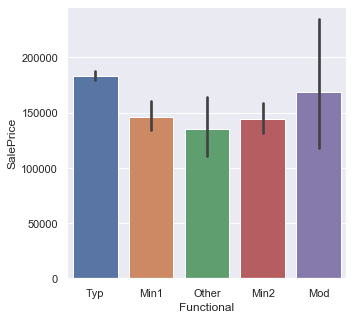

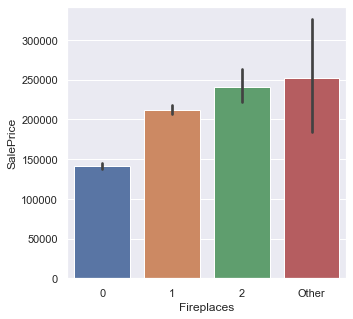

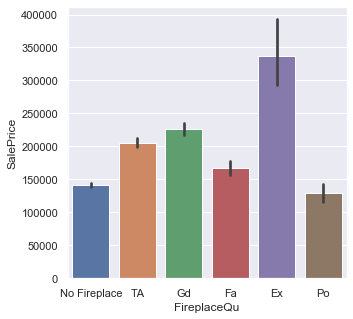

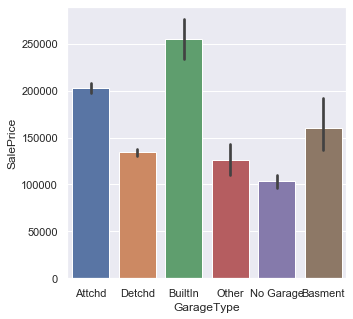

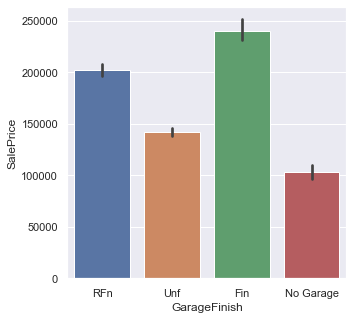

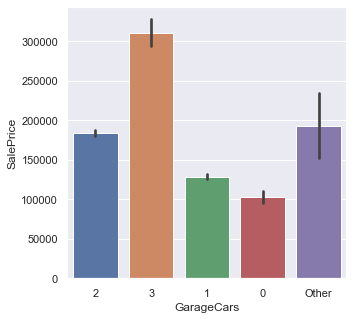

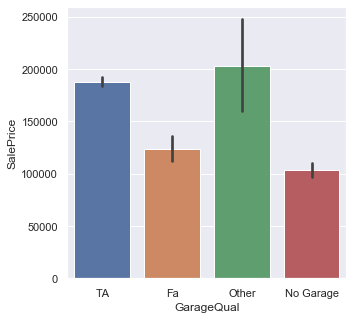

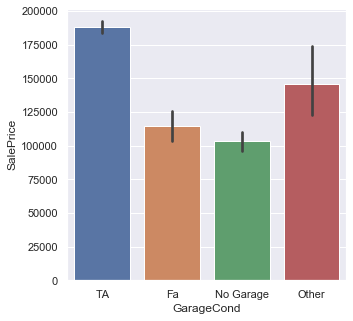

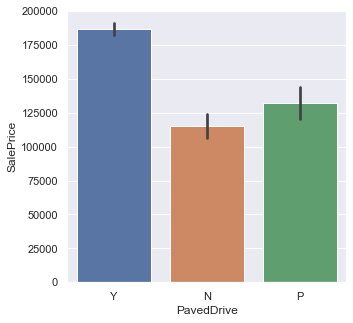

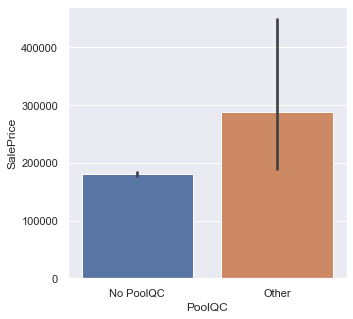

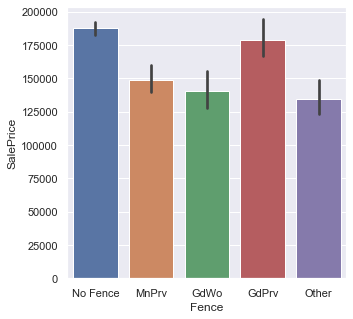

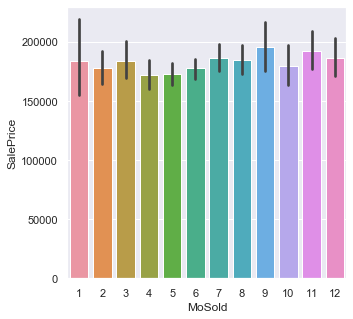

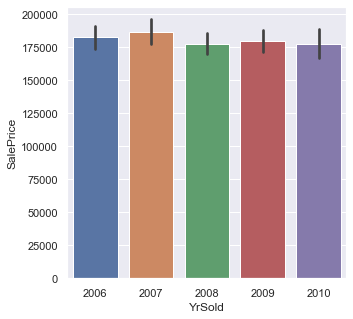

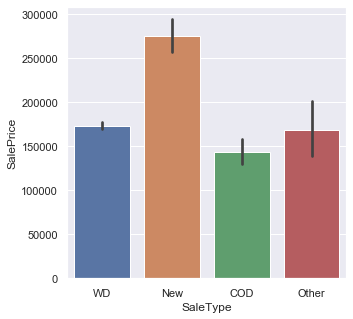

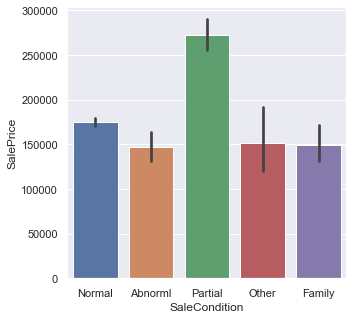

In [35]:
for i in housing_cat.columns:
    plt.figure(figsize=(5,5))
    sns.barplot(housing[i],housing['SalePrice'])

Exploring target variable 'SalePrice'

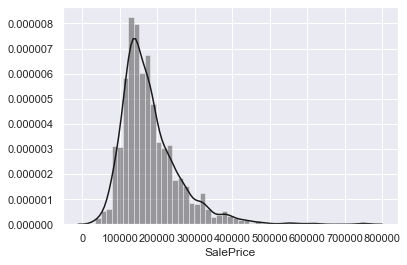

In [36]:
sns.distplot(housing['SalePrice'],color='k')

Transforming Target variable to make it normal distribution

In [37]:
housing['SalePrice']=housing['SalePrice'].apply(lambda x:np.log(x))

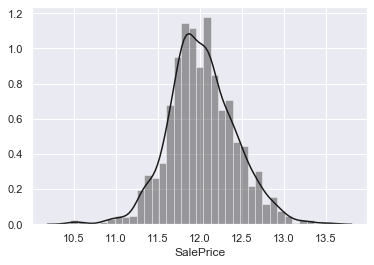

In [38]:
sns.distplot(housing['SalePrice'],color='k')

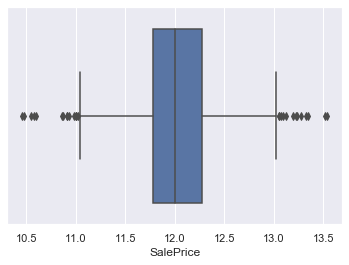

In [39]:
sns.boxplot(housing['SalePrice'])


We can see from above graphs that
- Prices were postivly skewed means less no of houses with very high prices

- Thus we applied log transformation to make it normal distribution.



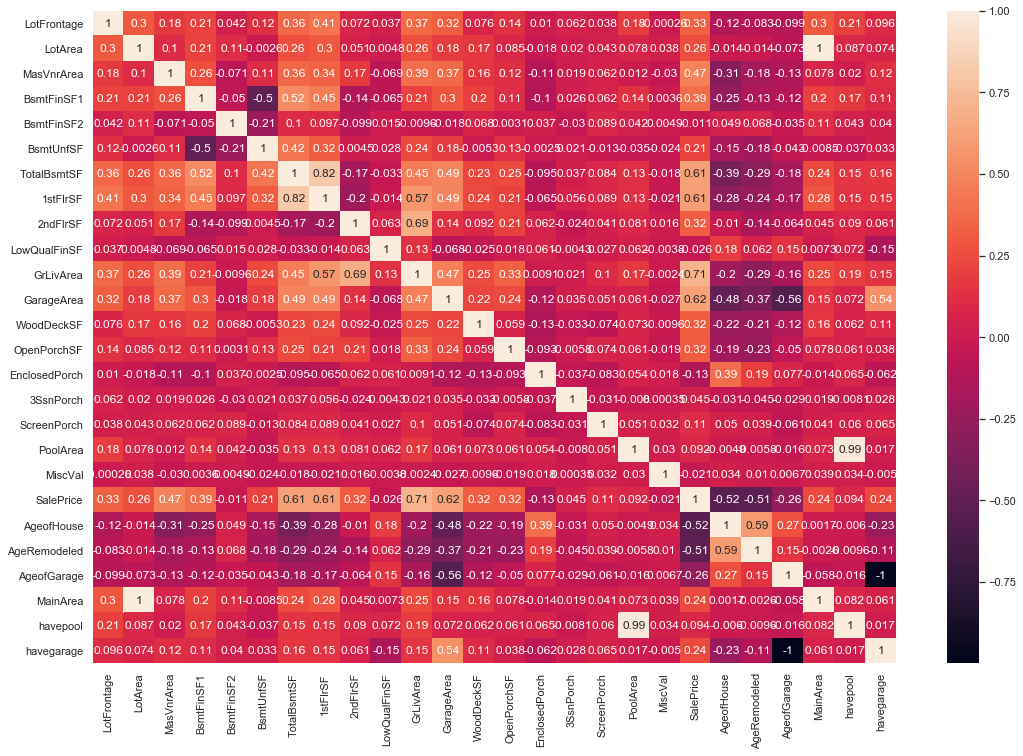

In [40]:
#Checking Correlation between variables
plt.figure(figsize=(18,12))
sns.heatmap(housing_nums.corr(),annot=True)

# Data Preparation

- Creating Dummy Variables
- Convert Yes/No variables or only two level variables in 0,1 mapping
- Converting all other variables into dummy variables using automatic dropping and manual dropping for some variables

In [41]:
#Converting binary variables to 1 and 0
housing['CentralAir']=housing['CentralAir'].map({'Y': 1, "N": 0})                                               

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   object 
 15  OverallCond    1460 non-null   object 
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

There is need to drop dummy variables which we know has less significance manually
- 'GarageType','GarageFinish','GarageQual','GarageCond' has a level 'No Garage'
- 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' has a level 'No basement'

In [43]:
#Listing columns to drop manually and automatically
Manual_dropping_cols=['GarageType','GarageFinish','GarageQual','GarageCond',
                     'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',]
list1=list(housing_cat.columns)
for i in housing_cat.columns:
    if i in (Manual_dropping_cols+['CentralAir']):
        list1.remove(i)

In [44]:
# Creating dummy variables for the columns where we can automatically drop first
dummy1=pd.get_dummies(housing[list1],drop_first=True)
housing=pd.concat([housing,dummy1],axis=1)
#dropping original columns
housing.drop(list1,axis=1,inplace=True)

In [45]:
housing.shape

(1460, 237)

In [46]:
#creating and dropping dummy variables manually
for i in Manual_dropping_cols:
    ml=pd.get_dummies(housing[i],prefix=i)
    if i in ['GarageType','GarageFinish','GarageQual','GarageCond']:
        ml.drop([i+'_No Garage'],1,inplace=True)
    else:
        if i+'_No Basement' in ml.columns:
            ml.drop([i+'_No Basement'],1,inplace=True)
        else:
            ml.drop([i+'_Other'],1,inplace=True)         
    housing=pd.concat([housing,ml],axis=1)
housing.drop(Manual_dropping_cols,axis=1,inplace=True)

In [47]:
housing.shape

(1460, 266)

We finally created all dummy variables and final shape of dataframe is (1460,228).
- Train test split and 
- Feature rescaling is to be done on left numerical variables

In [48]:
from sklearn.model_selection import train_test_split


In [49]:
y=housing.pop('SalePrice')
x=housing

In [50]:
# Splitting the data into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

Feature Rescaling

In [51]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
#listing columns to be rescaled
l1=list(housing_nums.columns)
l1.remove('SalePrice')

In [53]:
#fitting and transforming scaler on training set
X_train[l1]=scaler.fit_transform(X_train[l1])

In [54]:
#transforming on test set
X_test[l1]=scaler.transform(X_test[l1])

In [55]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeofHouse,AgeRemodeled,AgeofGarage,MainArea,havepool,havegarage,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_190,MSSubClass_Other,MSZoning_Other,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_Other,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,LotConfig_Other,LandSlope_Mod,LandSlope_Other,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Other,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Feedr,Condition1_Norm,Condition1_Other,Condition1_PosN,Condition1_RRAn,Condition2_Other,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Other,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallQual_Other,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,OverallCond_Other,RoofStyle_Hip,RoofStyle_Other,RoofMatl_Other,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Other,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_Other,ExterQual_TA,ExterCond_Gd,ExterCond_Other,ExterCond_TA,Foundation_CBlock,Foundation_Other,Foundation_PConc,Foundation_Slab,Heating_GasW,Heating_Other,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Other,HeatingQC_TA,Electrical_FuseF,Electrical_Other,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_Other,BsmtHalfBath_1,BsmtHalfBath_Other,FullBath_2,FullBath_3,FullBath_Other,HalfBath_1,HalfBath_Other,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_Other,KitchenAbvGr_2,KitchenAbvGr_Other,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_Other,Functional_Min2,Functional_Mod,Functional_Other,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_Other,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_Other,PavedDrive_P,PavedDrive_Y,PoolQC_Other,Fence_GdWo,Fence_MnPrv,Fence_No Fence,Fence_Other,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_New,SaleType_Other,SaleType_WD,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Other,SaleCondition_Partial,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_Other,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Other,GarageQual_TA,GarageCond_Fa,GarageCond_Other,GarageCond_TA,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Other,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,Bsmt

# Model Building and Evaluation

## Ridge Regression

In [56]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

Recursive Feature Elimination

In [57]:
from sklearn.feature_selection import RFE

In [58]:
lm=LinearRegression()
lm.fit(X_train,y_train)  #building a linear regression model using sklearn libarary
rfe=RFE(lm,50)  #taking top 50 features by instantiating object for RFE
rfe=rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 211),
 ('LotArea', False, 181),
 ('MasVnrArea', False, 202),
 ('BsmtFinSF1', False, 174),
 ('BsmtFinSF2', False, 175),
 ('BsmtUnfSF', False, 177),
 ('TotalBsmtSF', False, 176),
 ('CentralAir', False, 64),
 ('1stFlrSF', False, 20),
 ('2ndFlrSF', False, 19),
 ('LowQualFinSF', False, 23),
 ('GrLivArea', True, 1),
 ('GarageArea', False, 185),
 ('WoodDeckSF', False, 168),
 ('OpenPorchSF', False, 214),
 ('EnclosedPorch', False, 173),
 ('3SsnPorch', False, 191),
 ('ScreenPorch', False, 171),
 ('PoolArea', True, 1),
 ('MiscVal', False, 205),
 ('AgeofHouse', True, 1),
 ('AgeRemodeled', False, 111),
 ('AgeofGarage', False, 179),
 ('MainArea', False, 150),
 ('havepool', True, 1),
 ('havegarage', True, 1),
 ('MSSubClass_30', False, 22),
 ('MSSubClass_50', False, 32),
 ('MSSubClass_60', False, 37),
 ('MSSubClass_70', False, 33),
 ('MSSubClass_75', False, 40),
 ('MSSubClass_80', False, 72),
 ('MSSubClass_85', False, 122),
 ('MSSubClass_90', False, 28),
 ('MSSubClass_120', Fal

In [59]:
cols=X_train.columns[rfe.support_]
print(cols)

Index(['GrLivArea', 'PoolArea', 'AgeofHouse', 'havepool', 'havegarage',
       'MSSubClass_160', 'MSZoning_Other', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Condition2_Other',
       'BldgType_2fmCon', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9',
       'OverallQual_10', 'OverallQual_Other', 'OverallCond_4', 'OverallCond_5',
       'OverallCond_6', 'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'OverallCond_Other', 'Exterior1st_BrkFace', 'ExterQual_Other',
       'ExterCond_Other', 'HeatingQC_Other', 'BsmtFullBath_Other',
       'BedroomAbvGr_5', 'KitchenAbvGr_2', 'TotRmsAbvGrd_11',
       'Functional_Other', 'Fireplaces_Other', 'GarageCars_1', 'GarageCars_3',
       'GarageCars_Other', 'SaleType_New', 'BsmtQual_Ex', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd',
       'BsmtCond_Other', 'BsmtCond_TA', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ',
       'BsmtFinType1_GLQ', 'BsmtFinType1_Rec'],
      dt

We have applied RFE and took top 50 features to build regression model

In [60]:
X_train=X_train[cols]
X_test=X_test[cols]

We are using grid-search cross validation to tune hyperparameter lambda which we call here alpha.

In [61]:
#list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge=Ridge()

model_cv=GridSearchCV(estimator=ridge,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     return_train_score=True,
                      verbose=1                      
                     )

In [62]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [63]:
#taking results of cross-validation onto separate datframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005787,0.003475,0.001966,0.001231,0.0001,{'alpha': 0.0001},-0.110560,-0.105512,-0.100493,-0.091951,-0.090594,-0.099822,0.007684,21,-0.089045,-0.087643,-0.088090,-0.090996,-0.091220,-0.089399,0.001469
1,0.002156,0.000084,0.000852,0.000046,0.001,{'alpha': 0.001},-0.110547,-0.105509,-0.100496,-0.091946,-0.090587,-0.099817,0.007683,20,-0.089045,-0.087644,-0.088092,-0.090997,-0.091222,-0.089400,0.001469
2,0.001825,0.000181,0.000706,0.000059,0.01,{'alpha': 0.01},-0.110412,-0.105477,-0.100520,-0.091901,-0.090522,-0.099766,0.007666,18,-0.089051,-0.087649,-0.088105,-0.091006,-0.091242,-0.089410,0.001472
3,0.001694,0.000040,0.000681,0.000018,0.05,{'alpha': 0.05},-0.109845,-0.105342,-0.100618,-0.091705,-0.090274,-0.099557,0.007593,17,-0.089077,-0.087669,-0.088160,-0.091045,-0.091317,-0.089454,0.001483
4,0.001764,0.000054,0.000701,0.000006,0.1,{'alpha': 0.1},-0.109201,-0.105186,-0.100725,-0.091474,-0.090036,-0.099324,0.007507,16,-0.089109,-0.087694,-0.088225,-0.091090,-0.091404,-0.089504,0.001496


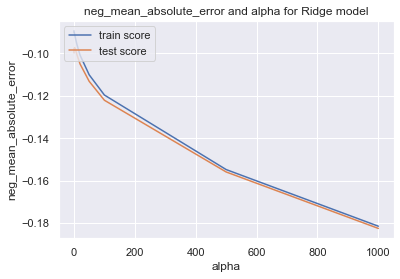

In [64]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error and alpha for Ridge model")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 2.0}
-0.09735295763362631


In [66]:
#building model using optimal alpha
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.18575904,  0.23097301, -0.11246812, -0.2563097 ,  0.03698182,
       -0.14492772, -0.31212719,  0.17579122,  0.15611036, -0.1907444 ,
       -0.10768701,  0.05954947,  0.09481882,  0.20132925,  0.32844904,
        0.16872163, -0.1923948 ,  0.00547916,  0.04537832,  0.1191558 ,
        0.16324221,  0.18310202,  0.20741899,  0.0811929 ,  0.13653855,
       -0.07648705,  0.146148  , -0.09768541,  0.09531217, -0.11203378,
       -0.10946713, -0.25481154, -0.13350468, -0.13330158, -0.07509463,
        0.08121802,  0.10683345,  0.04745241,  0.14680532,  0.0402313 ,
        0.05943548,  0.0418146 ,  0.03621709,  0.11502628,  0.03145569,
        0.10558764,  0.07536065,  0.06113409,  0.10085002,  0.04739944])

In [67]:
#taking coefficients in separate dataframe to plot the top predictors
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(ridge.coef_)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(10)

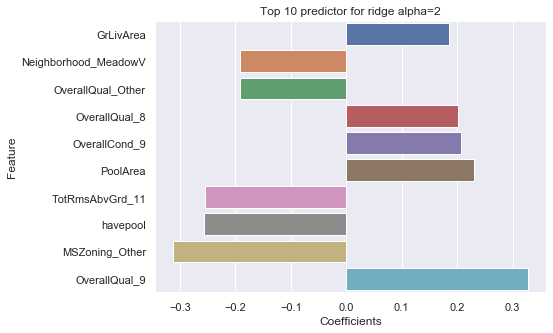

In [68]:
plt.figure(figsize=(7,5))
plt.title("Top 10 predictor for ridge alpha=2")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')

In [69]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))


0.8949802801259661
0.8449150564533712


Now lets double the value of alpha i.e. take alpha =4 and see the results

In [70]:
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.18624819,  0.1851079 , -0.11375591, -0.20996977,  0.03790036,
       -0.14306366, -0.26036545,  0.15818848,  0.14930446, -0.16167229,
       -0.08989079,  0.05340069,  0.09036873,  0.18880985,  0.29041065,
        0.12762093, -0.14408555, -0.02675575,  0.01295975,  0.08517857,
        0.12968695,  0.14591599,  0.16073539,  0.0346838 ,  0.1286605 ,
       -0.07220509,  0.10612188, -0.05807412,  0.0577813 , -0.09777735,
       -0.11001998, -0.21154878, -0.11896661, -0.10686886, -0.07530565,
        0.08914528,  0.08472912,  0.04531112,  0.14166138,  0.02627587,
        0.04845706,  0.03162816,  0.02539622,  0.10957607,  0.00972814,
        0.10332205,  0.07398582,  0.05814247,  0.1016419 ,  0.0435788 ])

In [71]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8900971482593732
0.8494988646470638


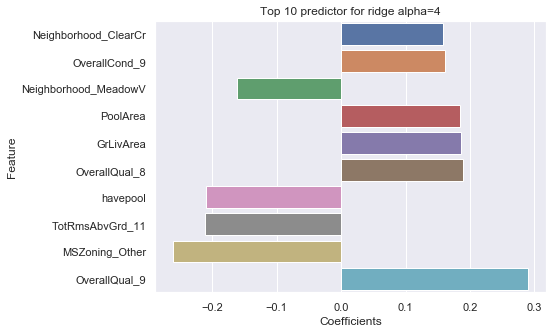

In [72]:
#plotting top 10 predictors after doubling alpha value
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(ridge.coef_)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(10)
plt.figure(figsize=(7,5))
plt.title("Top 10 predictor for ridge alpha=4")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')

In [73]:
#building model by increasing the value of alpha to show results 
alpha =20

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train)
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8639377875904708
0.8403010060024043


In [74]:
#building model by increasing the value of alpha to show results 
alpha =100

ridge = Ridge(alpha=alpha)
        
ridge.fit(X_train, y_train)
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.814921769132118
0.8002552002582353


# Lasso

 Now we build lasso model on selected 50 features left after RFE

In [75]:
lasso=Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

model_cv=GridSearchCV(estimator=lasso,
                     param_grid=params,
                     scoring='neg_mean_absolute_error',
                     cv=5,
                     return_train_score=True,
                     verbose=1)

In [76]:
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [77]:
#taking results of cross validation onto separate dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021293,0.014433,0.000800,0.000114,0.0001,{'alpha': 0.0001},-0.108336,-0.105437,-0.101613,-0.091200,-0.089623,-0.099242,0.007535,1,-0.089260,-0.087987,-0.088760,-0.091247,-0.091754,-0.089802,0.001454
1,0.010504,0.004634,0.000738,0.000038,0.001,{'alpha': 0.001},-0.098552,-0.108460,-0.109183,-0.095435,-0.092203,-0.100767,0.006880,2,-0.095190,-0.092947,-0.094011,-0.097082,-0.097303,-0.095307,0.001697
2,0.001859,0.000039,0.000706,0.000063,0.01,{'alpha': 0.01},-0.127819,-0.145376,-0.141897,-0.137136,-0.132828,-0.137011,0.006259,3,-0.135696,-0.133080,-0.134047,-0.135063,-0.137380,-0.135053,0.001465
3,0.002091,0.000294,0.000742,0.000076,0.05,{'alpha': 0.05},-0.149079,-0.163934,-0.160589,-0.164280,-0.165415,-0.160659,0.006009,4,-0.163572,-0.155501,-0.157926,-0.158760,-0.162747,-0.159701,0.003031
4,0.002007,0.000211,0.000739,0.000061,0.1,{'alpha': 0.1},-0.175848,-0.184755,-0.183097,-0.183126,-0.196353,-0.184636,0.006621,5,-0.187139,-0.180002,-0.182156,-0.183478,-0.186731,-0.183901,0.002717


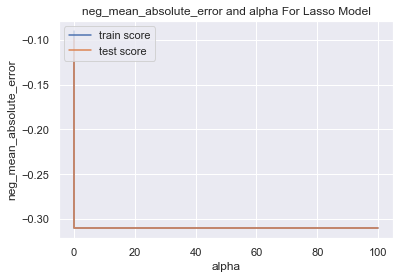

In [78]:
#plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

#plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error and alpha For Lasso Model")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
#printing optimal value of alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.0001}
-0.09924168584369289


In [80]:
#building the optimal alpha
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8982929189631293
0.8338330916537904


In [82]:
#number of non zero coefficients in lasso
len(lasso.coef_[lasso.coef_!=0])

50

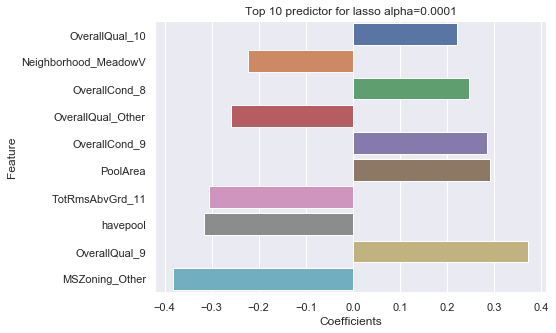

In [83]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(lasso.coef_)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(10)
#plotting top 10 predictors for the model
plt.figure(figsize=(7,5))
plt.title("Top 10 predictor for lasso alpha=0.0001")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')

# Doubling alpha

In [84]:
alpha =0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8964706924709003
0.8382089610735298


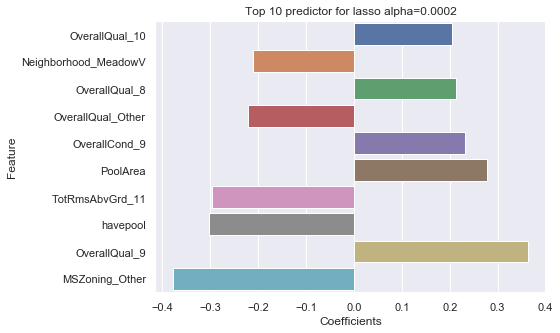

In [86]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(lasso.coef_)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(10)
plt.figure(figsize=(7,5))
plt.title("Top 10 predictor for lasso alpha=0.0002")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')

Increasing the value of alpha little more to compare resluts 

In [87]:
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.7553202920044844
0.7526750475487662


In [88]:
alpha =0.3

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.0
-0.00015844134896880746


Question 3-
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


In [89]:
top5=['MSZoning_Other','OverallQual_9','havepool','TotRmsAbvGrd_11','PoolArea']
X_train=X_train.drop(top5,axis=1)
X_test=X_test.drop(top5,axis=1)

In [90]:
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8662873352420999
0.8244848259320816


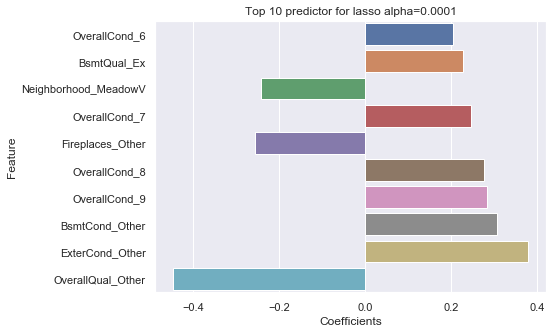

In [91]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(lasso.coef_)})
coefficients=coefficients.iloc[coefficients['Coefficients'].abs().argsort()]
coefficients=coefficients.tail(10)
plt.figure(figsize=(7,5))
plt.title("Top 10 predictor for lasso alpha=0.0001")
sns.barplot(coefficients['Coefficients'],coefficients['Feature'],orient = 'h')